In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Robustness_table_or_1 = pd.read_csv('Robustness_table_or_1.csv')
Robustness_table_or_2 = pd.read_csv('Robustness_table_or_2.csv')
Robustness_table_or_3 = pd.read_csv('Robustness_table_or_3.csv')

robustness_table_1 = pd.read_csv('robustness_table_1.csv')
robustness_table_2 = pd.read_csv('robustness_table_2.csv')
robustness_table_3 = pd.read_csv('robustness_table_3.csv')

#Robustness_table_star = pd.read_csv('Robustness_table_star.csv')
#Robustness_table_star_2 = pd.read_csv('Robustness_table_star_2.csv')
#Robustness_table_star_3 = pd.read_csv('Robustness_table_star_3.csv')

#Robustness_or_star = pd.read_csv('Robustness_or_star.csv') 
#Robustness_or_star_2 = pd.read_csv('Robustness_or_star_2.csv')
#Robustness_or_star_3 = pd.read_csv('Robustness_or_star_3.csv')

In [5]:
Robustness_table_or_1

,Unnamed: 0,0.1/0.5,0.1/0.75,0.1/0.9,0.25/0.5,0.25/0.75,0.25/0.9,0.5/0.5,0.5/0.75,0.5/0.9
0,Q1,NaN,NaN,NaN,1.82,2.03,2.49,2.14,2.42,2.97
1,Q2,NaN,NaN,NaN,0.80,0.82,0.91,1.32,1.49,1.64
2,Q3,3.06,4.08,6.72,3.06,4.08,6.72,3.06,4.08,6.72
3,Q4,1.19,1.11,1.04,1.19,1.11,1.04,1.19,1.11,1.04


In [6]:
Robustness_table_or_2

,Unnamed: 0,0.1/0.5,0.1/0.75,0.1/0.9,0.25/0.5,0.25/0.75,0.25/0.9,0.5/0.5,0.5/0.75,0.5/0.9
0,Q1,2.39,2.03,1.91,2.39,2.03,1.91,2.39,2.03,1.91
1,Q2,0.11,0.11,0.11,0.82,0.82,0.82,1.69,1.63,1.63
2,Q3,9.77,9.77,9.77,4.08,4.08,4.08,4.19,4.18,4.18
3,Q4,3.34,2.84,2.65,1.31,1.11,1.04,0.85,0.72,0.67


In [7]:
Robustness_table_or_3

,Unnamed: 0,0.1/0.5,0.1/0.75,0.1/0.9,0.25/0.5,0.25/0.75,0.25/0.9,0.5/0.5,0.5/0.75,0.5/0.9
0,Q1,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03
1,Q2,0.66,0.82,NaN,0.66,0.82,NaN,0.66,0.82,NaN
2,Q3,2.62,4.20,8.46,2.55,4.08,8.23,2.25,3.60,7.25
3,Q4,0.83,1.11,1.91,0.83,1.11,1.91,0.83,1.11,1.91


In [3]:
def plot_prob(df):
    
    df = df.set_index('Unnamed: 0')
    df = df.T
    # extract the grouping key from the index
    group_key = df.index.str.split('/').str[0]

    # create a dictionary of dataframes, one for each group
    groups = {key: df[df.index.str.split('/').str[0] == key] for key in group_key.unique()}

    star = plt.Line2D([0], [0], marker='*', color='w', markeredgecolor='k', markersize=15, label='0.25/0.75')
    vline = plt.Line2D([0], [0], color='black', linestyle='--', linewidth=1, label='Baseline')
    # create a 1x3 grid of subplots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 11))

    # loop through the subplots and plot the data
    for i, (key, group) in enumerate(groups.items()):
        group.plot(ax=axes[i], legend=None)
        y = df.loc['0.25/0.75', 'P(A|B)/P(A|C)']
        y2 = df.loc['0.25/0.75', 'P(A|D)/P(A|E)']
        for x in [0,1,2]:
            axes[i].plot(x, y, marker='*', markersize=7, color='teal')
            axes[i].plot(x, y2, marker='*', markersize=7, color='orange')
        axes[i].set_title('Low threshold: {}'.format(key))
        axes[i].set_xlabel('High threshold.')
        axes[i].set_xticklabels(["",0.5,"","","",0.75,"","","",0.9,""])
        yticks = axes[i].get_yticks()[::2]
        axes[i].set_yticks(yticks)
        handles, labels = axes[i].get_legend_handles_labels()
        vert_line = plt.Line2D([0], [0], color='black', linestyle='--', linewidth=1, label='0.25/0.75')
        handles.extend([star, vert_line])
        labels.extend(['Baseline values', 'Baseline'])
        axes[i].legend(handles=handles, labels=labels)
        if '0.25/0.75' in group.index:
            x = group.index.get_loc('0.25/0.75')
            y = group.loc['0.25/0.75', 'P(A|B)/P(A|C)']
            y2 = group.loc['0.25/0.75', 'P(A|D)/P(A|E)']
            axes[i].axvline(x=x, color='black', linestyle='--', linewidth=1)
            

    # set the main title and adjust the spacing
    #fig.suptitle('P(A|B)/P(A|C) and P(A|D)/P(A|E)', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    #fig.legend(handles, labels, loc='lower right', ncol=2)


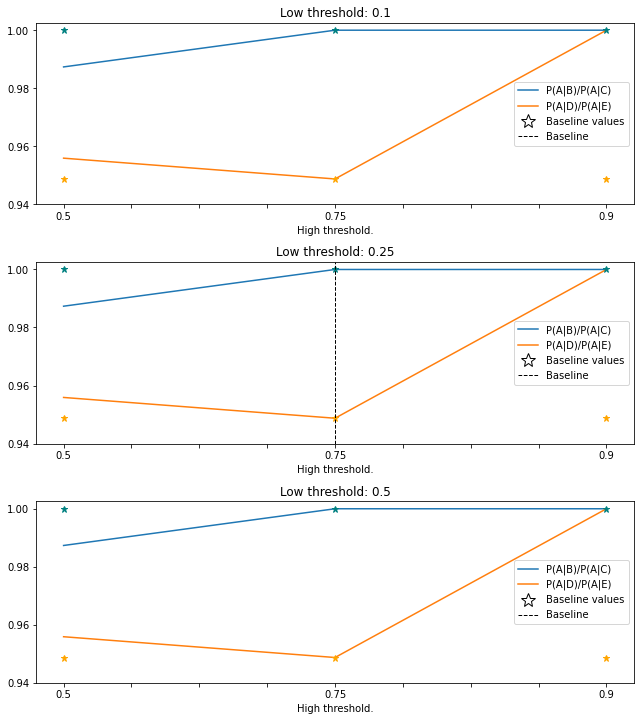

In [186]:
plot_prob(robustness_table_1)

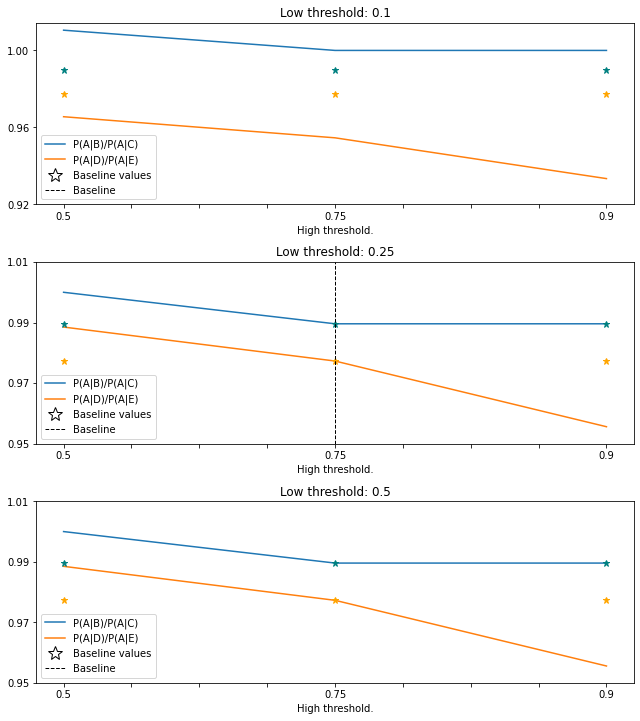

In [187]:
plot_prob(robustness_table_2)

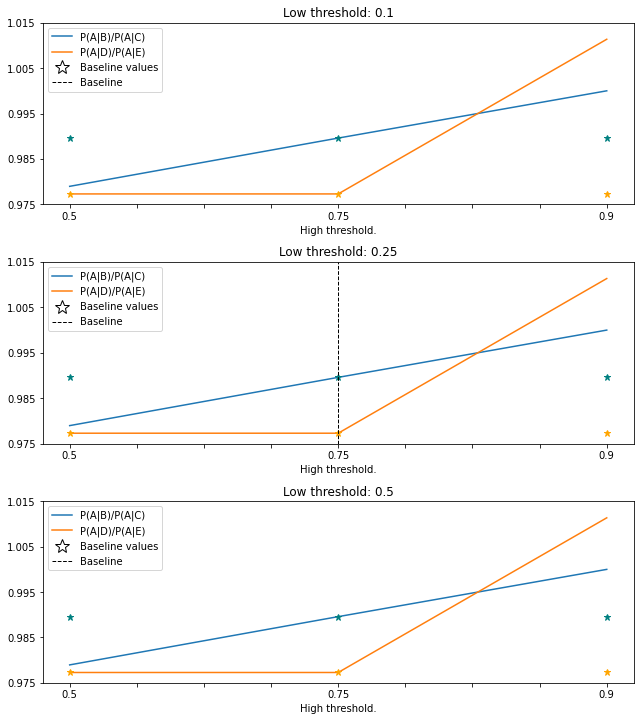

In [188]:
plot_prob(robustness_table_3)

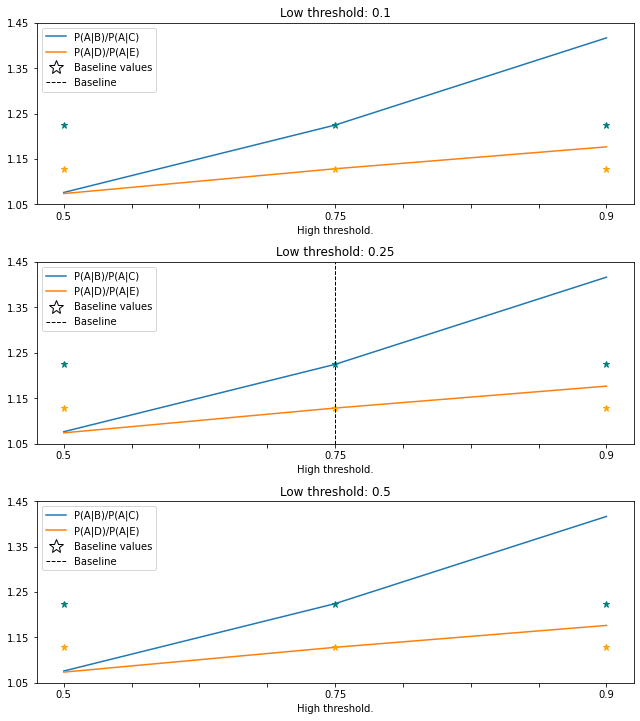

In [189]:
plot_prob(Robustness_table_star)

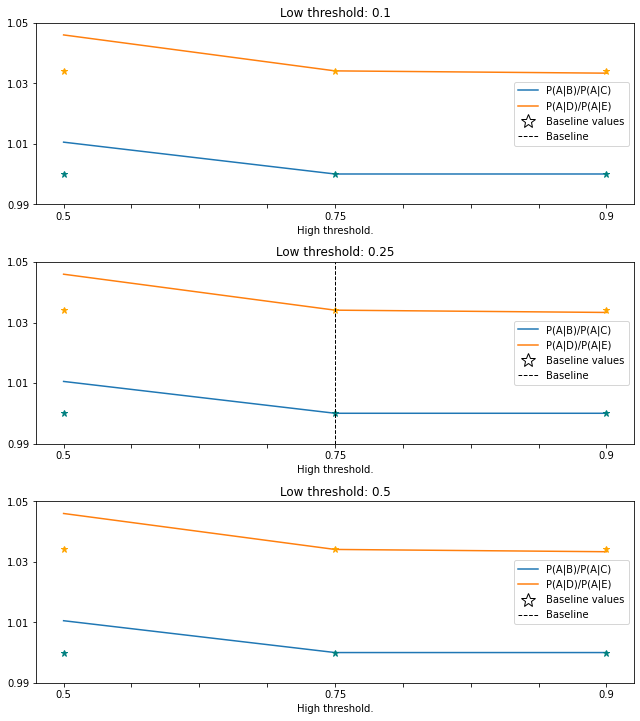

In [190]:
plot_prob(Robustness_table_star_2)

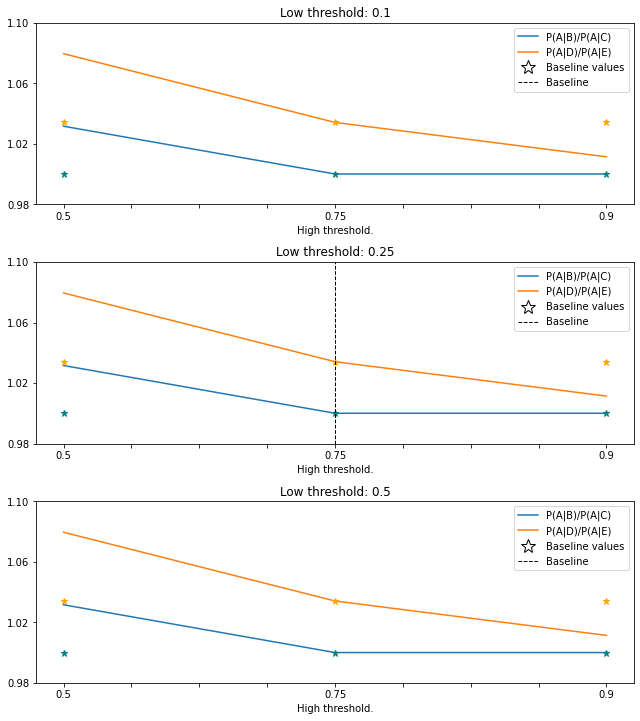

In [191]:
plot_prob(Robustness_table_star_3)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def orPLot(df, title = None):
    # set custom font styles
    sns.set_style('white')
    sns.set_context('notebook', font_scale=1.2)
    sns.set_palette(sns.color_palette(['#8FB9A8', '#EEB868', '#DF5A49', '#AF69B1']))

    # melt the dataframe to get it in the right format for the plot
    melted_df = df.melt(id_vars='Unnamed: 0')
    melted_df[['low', 'high']] = melted_df['variable'].str.split('/', expand=True)
    melted_df.columns = ['Q', 'variable', 'value', 'low', 'high']
    grid = sns.FacetGrid(melted_df, row='low', col='Q', height=2.5, aspect=2, sharex=False, sharey = "col")
    grid.map(sns.lineplot, 'high', 'value')

    for ax, low in zip(grid.axes[:,0], melted_df['low'].unique()):
        ax.set_ylabel(f"Low = {low}", fontsize=14)

    for ax, high in zip(grid.axes[-1], melted_df['high'].unique()):
        ax.set_xlabel(f"High threshold", fontsize=14)
        ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=12)

    # set plot title
    if title != None:
        plt.suptitle('{}'.format(title), fontsize=20)

    # Add star to indicate the value where low = 0.25 and high = 0.75
    for i, ax in enumerate(grid.axes.flat):
        Q = ['Q1', 'Q2', 'Q3', 'Q4','Q1', 'Q2', 'Q3', 'Q4','Q1', 'Q2', 'Q3', 'Q4','Q1', 'Q2', 'Q3', 'Q4'][i] #WRITE CODE TO MODIFY Q
        star_value = melted_df[(melted_df['low']=='0.25') & (melted_df['high']=='0.75') & (melted_df['Q']==Q)]['value'].values[0]
        ax.plot([0,1,2], [star_value,star_value,star_value], marker='*', markersize=10, color='#DF5A49', linestyle = 'None')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.4)
    plt.show()


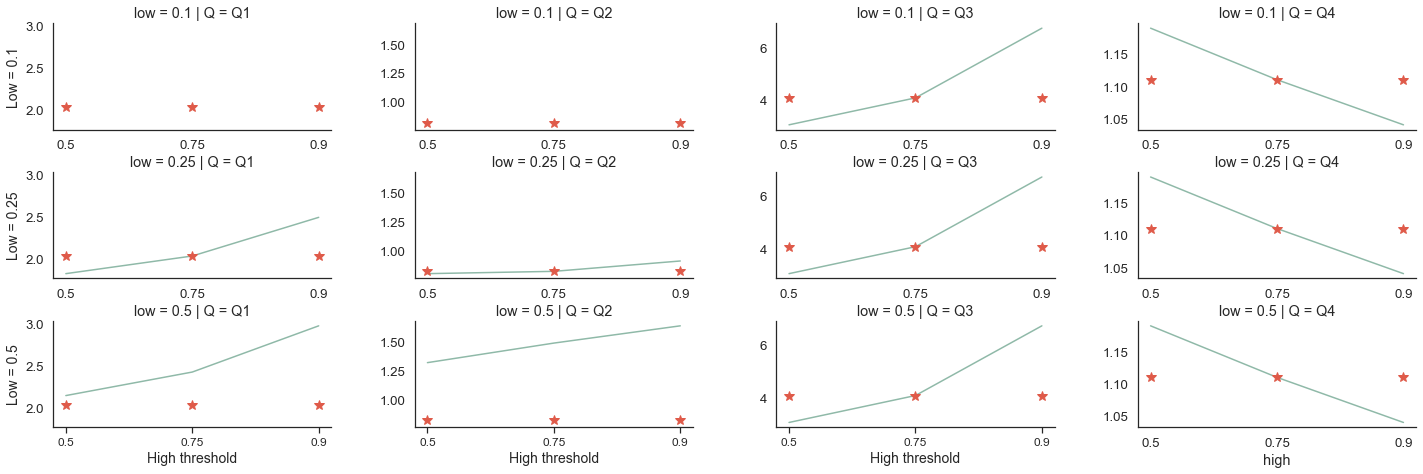

In [404]:
orPLot(Robustness_table_or_1, title = None)

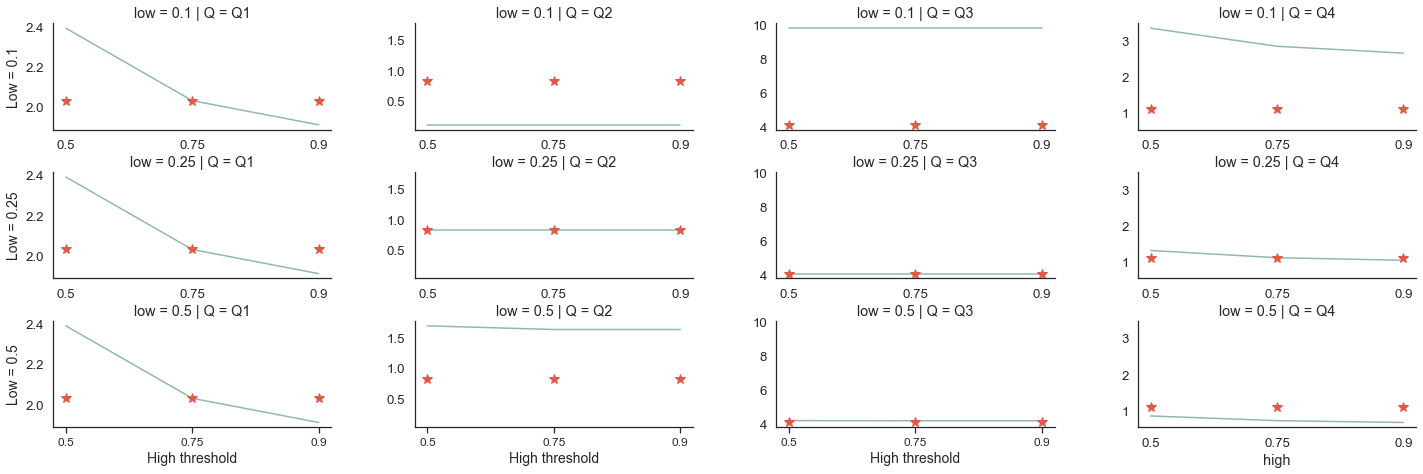

In [405]:
orPLot(Robustness_table_or_2, title = None)

Figure \ref{fig:robustness_or_2} investigates how robust are the results in section 3 to varying the high/low outdegree level's threshold. The results for "3.1 Are successful creators more connected to high-outdegree users than do unsuccessful creators?", despite the diminishing odds ratio as the high threshold increases, support the conclusion that successful creators connect to high outdegree users more often. The results for "3.2 Do successful creators connect to stars more than unsuccessful creators?", on the other hand, change substantially, when the low outdegree threshold is 0.1, unsuccessful creators appear connecting to mavens more often, while when that threshold is 0.5, successful creators show odds to connect to mavens that are 1.5 times the one of unsuccessful creators. The results for "3.3 Do successful creators target more Stars than Zombies with non-follow actions?" varies as we vary the threshold for low outdegree level, the conclusion, however, stays the same, i.e. successful creators target mavens more often then to zombies with non-follow actions. The odds ratios for "3.4 Do successful creators target more Stars than Stalkers with non-follow actions?" change from strongly supporting that successful creators prioritize mavens over stars, when the low threshold is 0.1, to indicating that they favor stars over mavens, althoug not that starkly.

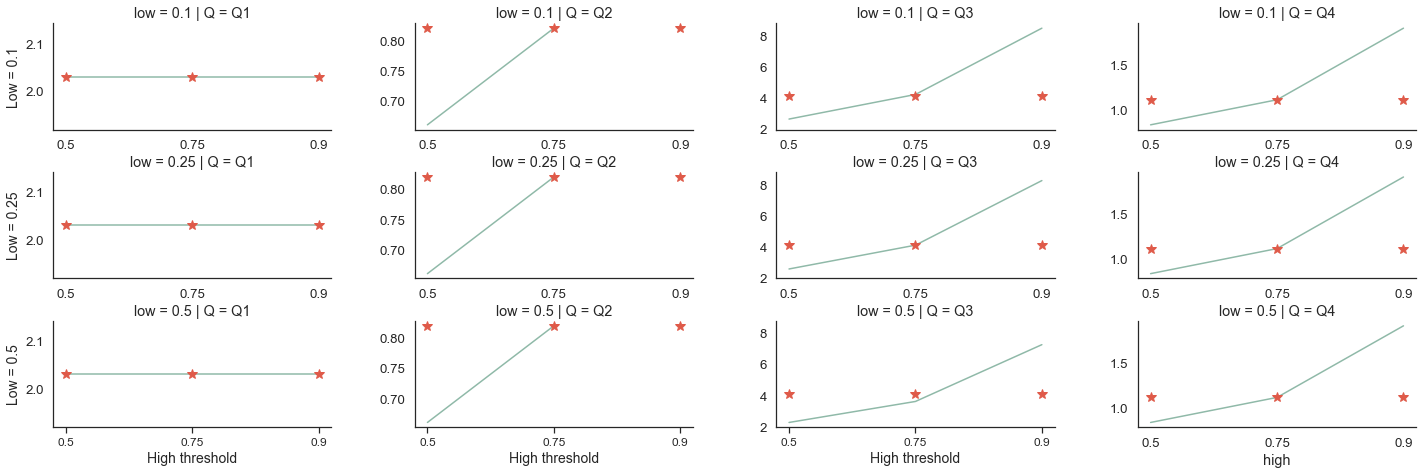

In [406]:
orPLot(Robustness_table_or_3, title = None)

Figure \ref{fig:robustness_or_3} shows that the results for 3.1, 3.2 and 3.3 are robust to changes in the non-follow activity level thresholds. 3.4, however, goes from showing that successful creators slightly favors stars over mavens, to indicating they strongly favors mavens over star as the high non-follow activity threshold goes from 0.5 to 0.9.
The odds ratio for 3.2 couldn't be estimated at the high threshold of 0.9

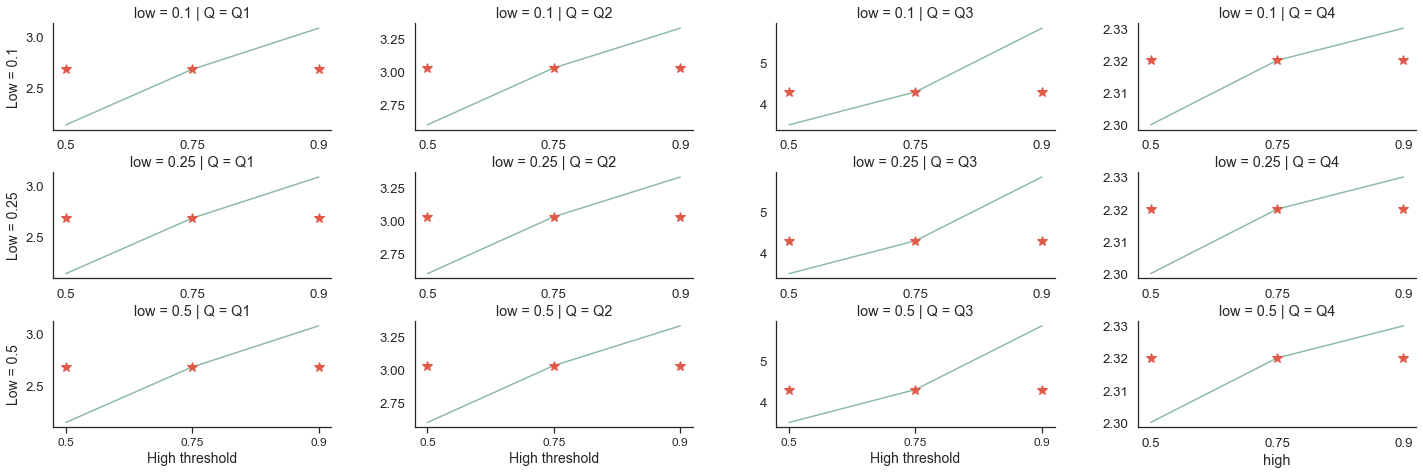

In [410]:
orPLot(Robustness_or_star, title = None)

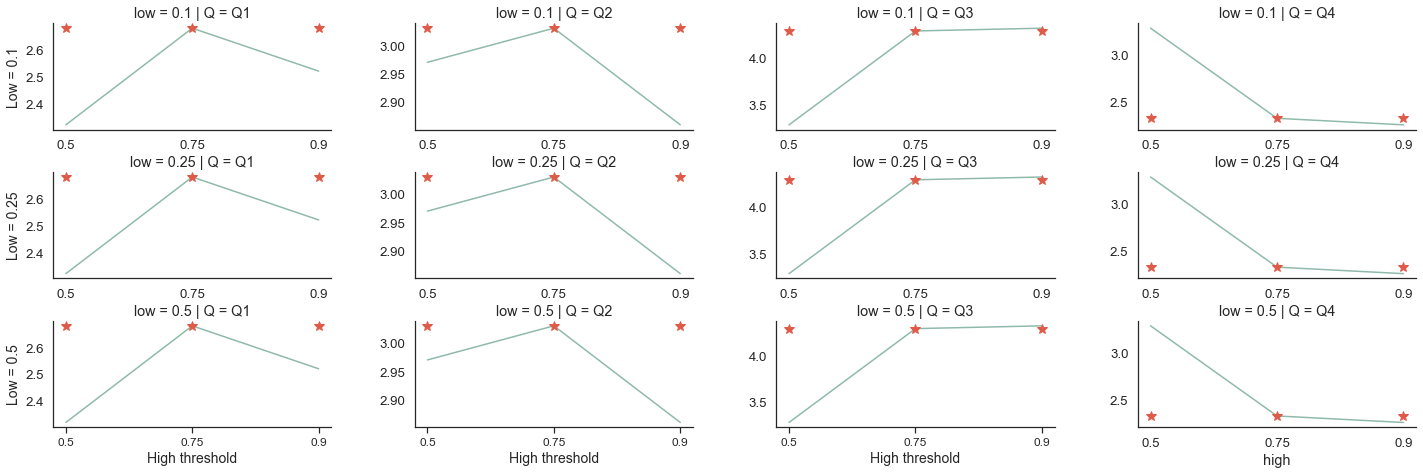

In [411]:
orPLot(Robustness_or_star_2, title = None)

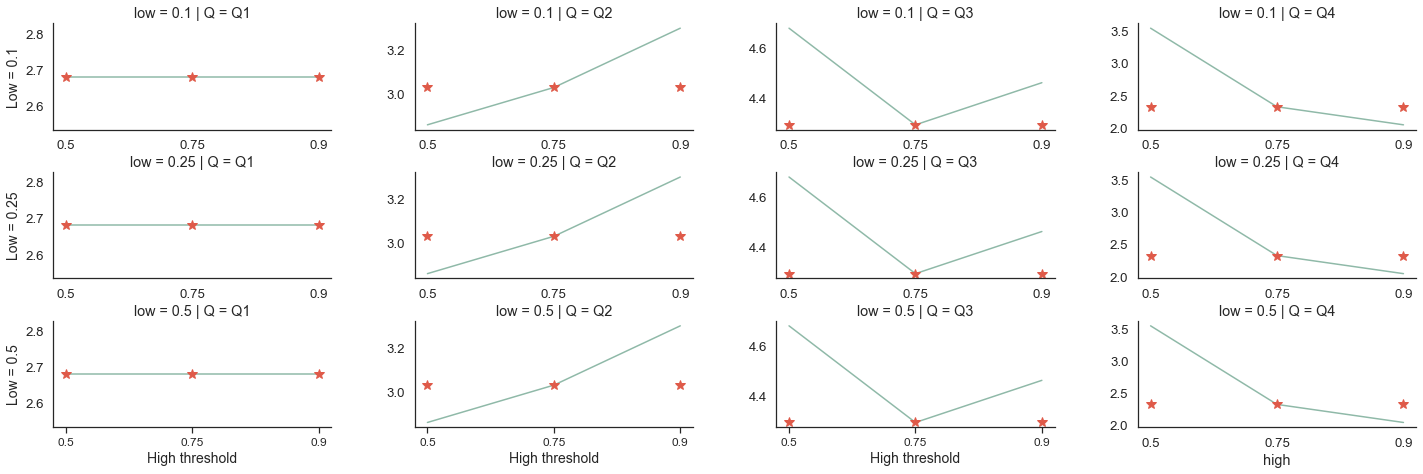

In [412]:
orPLot(Robustness_or_star_3, title = None)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def orPLotEMAC(df, var = None, title = None):
    # set custom font styles
    sns.set_style('white')
    sns.set_context('notebook', font_scale=1.2)
    sns.set_palette(sns.color_palette(['#8FB9A8', '#EEB868', '#DF5A49', '#AF69B1']))

    # melt the dataframe to get it in the right format for the plot
    melted_df = df.melt(id_vars='Unnamed: 0')
    melted_df[['low', 'high']] = melted_df['variable'].str.split('/', expand=True)
    melted_df.columns = ['Q', 'variable', 'value', 'low', 'high']
    grid = sns.FacetGrid(melted_df, row='low', col='Q', height=2.5, aspect=2, sharex=False, sharey = "col")
    grid.map(sns.lineplot, 'high', 'value')

    for ax, low in zip(grid.axes[:,0], melted_df['low'].unique()):
        ax.set_ylabel(f"Low = {low}", fontsize=14)

    for ax, high in zip(grid.axes[-1], melted_df['high'].unique()):
        ax.set_xlabel(f"High threshold", fontsize=14)
        ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=12)

    # set plot title
    if title != None:
        plt.suptitle('{}'.format(title), fontsize=20)

    # Add star to indicate the value where low = 0.25 and high = 0.75
    for i, ax in enumerate(grid.axes.flat):
        Q = ['Q1','Q2', 'Q3','Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3'][i] #WRITE CODE TO MODIFY Q
        if var == 'success':
            star_value = melted_df[(melted_df['low']=='0.5') & (melted_df['high']=='0.9') & (melted_df['Q']==Q)]['value'].values[0]
        else:
            star_value = melted_df[(melted_df['low']=='0.25') & (melted_df['high']=='0.75') & (melted_df['Q']==Q)]['value'].values[0]

        ax.plot([0,1,2], [star_value,star_value,star_value], marker='*', markersize=10, color='#DF5A49', linestyle = 'None')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.4)
    plt.show()


In [16]:
df = Robustness_table_or_1.iloc[1:4,:]
df.iloc[0,0] = 'Q1'
df.iloc[1,0] = 'Q2'
df.iloc[2,0] = 'Q3'

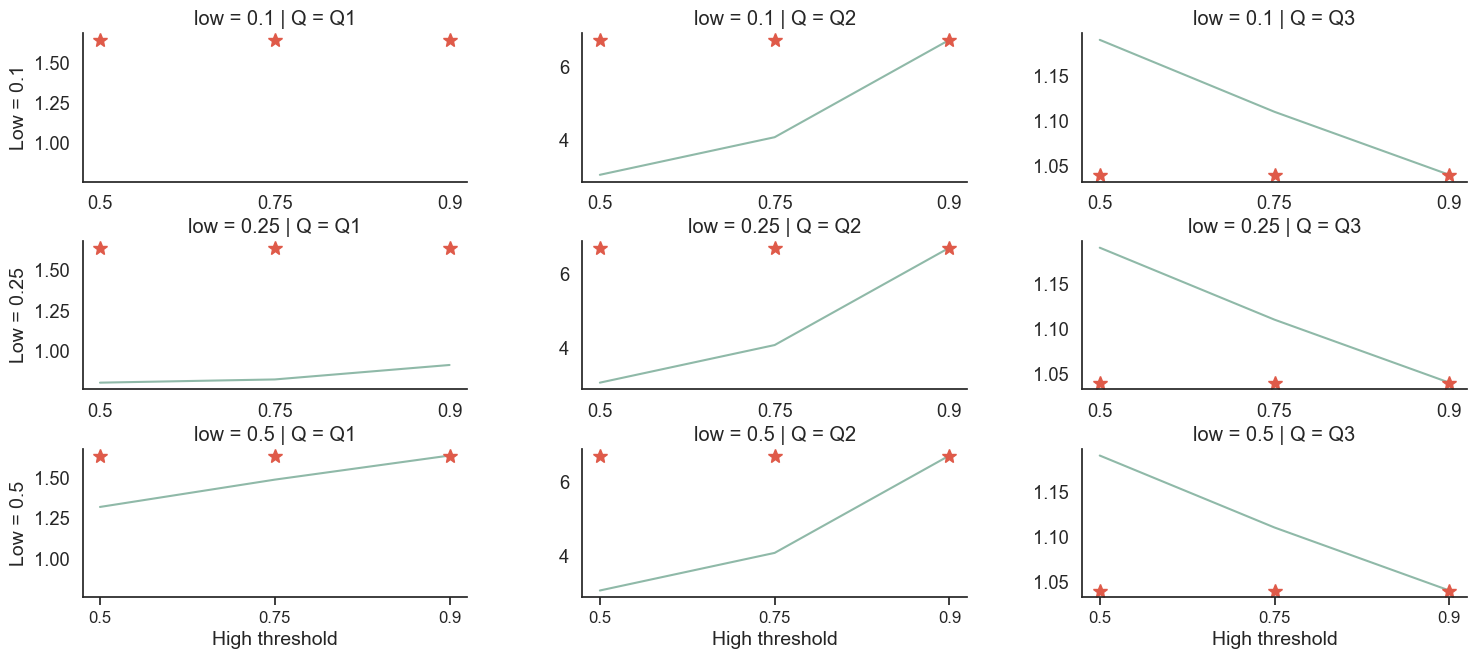

In [23]:
orPLotEMAC(df, var = 'success')

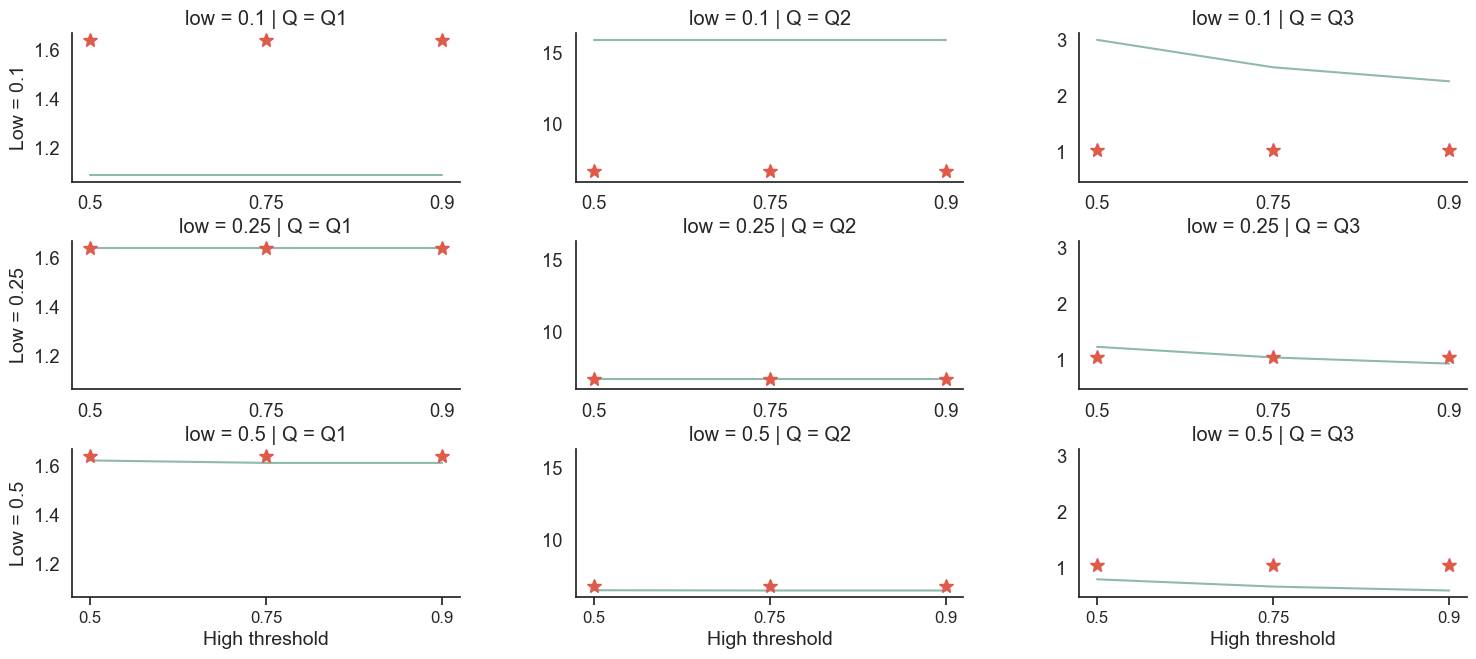

In [25]:
df = Robustness_table_or_2.iloc[1:4,:]
df.iloc[0,0] = 'Q1'
df.iloc[1,0] = 'Q2'
df.iloc[2,0] = 'Q3'

orPLotEMAC(df)

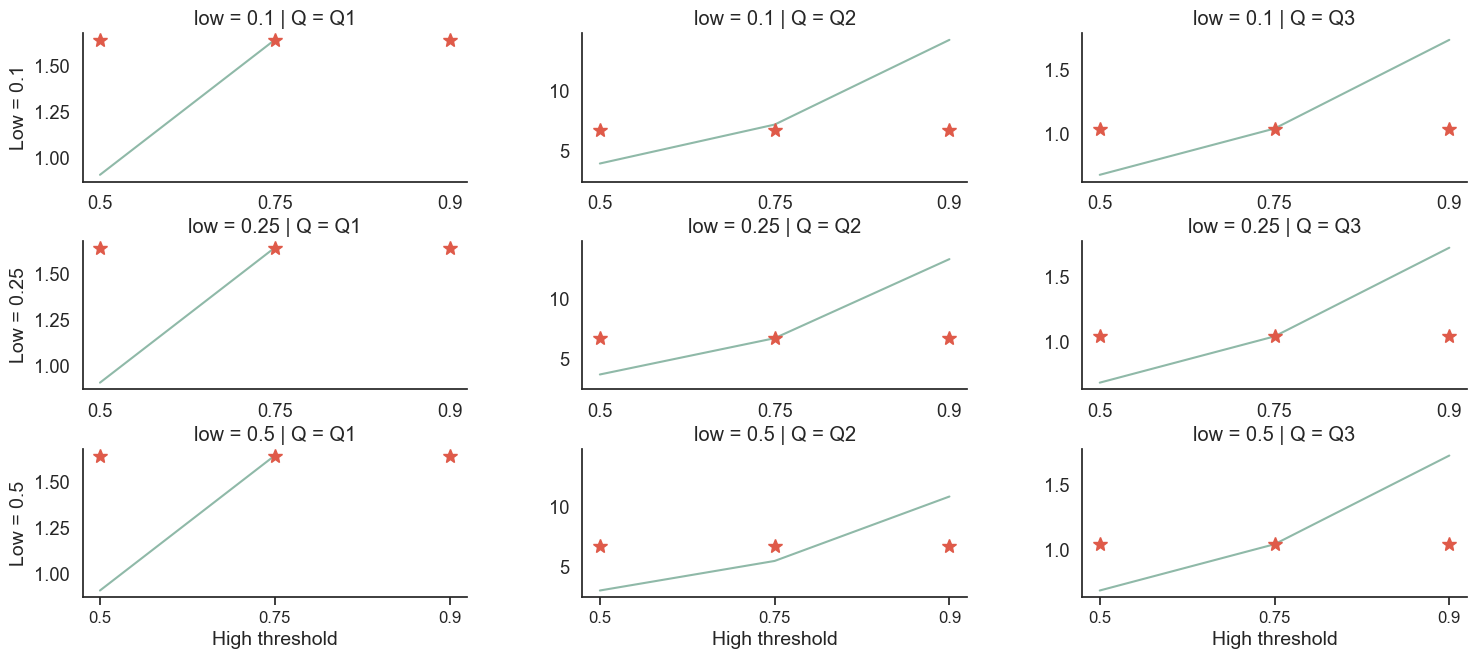

In [24]:
df = Robustness_table_or_3.iloc[1:4,:]
df.iloc[0,0] = 'Q1'
df.iloc[1,0] = 'Q2'
df.iloc[2,0] = 'Q3'

orPLotEMAC(df)